# Titanic Model

## Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(6,4))
%matplotlib inline

In [170]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

## Data Reading and Understanding

In [171]:
df= pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [172]:
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [173]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [175]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
df['Family_Member']=df['SibSp']+df['Parch']

In [177]:
df.drop(columns=['SibSp','Parch'], inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Member
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S,0
887,1,1,female,19.0,30.0000,B42,S,0
888,0,3,female,NaN,23.4500,NaN,S,3
889,1,1,male,26.0,30.0000,C148,C,0


In [178]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [179]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [180]:
df.drop(columns=['Cabin'], inplace=True)

### Copy of DF Till now

In [181]:
df_copy=df.copy()

## Randomly Filling Age Values, Fixing Fare & Embarked

In [182]:
df['Age_Missing']=np.where(df['Age'].isna(), 1,0)

In [183]:
df['Age_fixed']=df['Age']

In [184]:
df['Age_fixed'][df['Age_fixed'].isna()]= df['Age'].dropna().sample(df['Age'].isnull().sum()).values

C:\Users\abhin\AppData\Local\Temp\ipykernel_16024\2579341055.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age_fixed'][df['Age_fixed'].isna()]= df['Age'].dropna().sample(df['Age'].isnull().sum()).values
C:\Users\abhin\AppData\Local

In [185]:
df.drop(columns=['Age'], inplace=True)

In [186]:
df['Embarked']=np.where(df['Embarked'].isna(), 'S', df['Embarked'])
df['Embarked'].isna().sum()

0

In [187]:
print(df[df['Pclass']==1]['Fare'].describe())
print(df[df['Pclass']==2]['Fare'].describe())
print(df[df['Pclass']==3]['Fare'].describe())

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [188]:
df['Fare']=np.where(df['Pclass']==1, 100, np.where(df['Pclass']==2, 25, 11))

## Data Analysis

In [189]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family_Member',
       'Age_Missing', 'Age_fixed'],
      dtype='object')

### Pandas Profiling

In [190]:
from ydata_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\abhin\.conda\envs\test1\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 0 9 0 0 9 0 0 1 0 9 0 0 0 1 0 1 0 0 1 1 0 9 0 0 0 9 0 0 9 9 0 1 9 9 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 9 1 9 9 1 0 1 0 0 9 9 0 9 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 9 1 0 0 0 9 0 0 0 9 0 0 0 9 9 1 1 0 0 9 0 0 0 0 0 0 0 9
 0 0 0 0 0 0 1 9 0 1 0 1 1 9 0 0 0 0 0 0 0 0 1 1 1 9 9 0 9 0 0 0 0 1 1 0 0
 1 1 1 9 0 0 0 9 0 0 0 0 0 1 0 0 0 0 9 0 9 0 9 0 0 0 9 0 0 9 1 0 0 1 0 1 0
 9 0 9 0 0 1 1 0 1 9 9 0 0 0 1 0 0 0 0 0 0 0 0 0 9 0 1 0 1 0 9 0 1 9 1 0 1
 0 0 9 0 1 0 1 0 9 0 1 0 1 0 1 1 1 1 0 0 1 0 0 9 0 1 9 1 0 0 9 0 0 0 9 9 9
 1 0 0 9 9 0 1 0 0 9 9 9 0 1 9 0 9 0 1 0 0 0 0 0 0 9 0 0 0 1 0 9 9 1 0 0 9
 0 9 9 9 0 0 0 1 0 9 9 9 1 9 9 9 1 0 1 0 1 1 9 9 0 0 1 1 0 9 0 1 0 9 0 9 9
 0 9 0 9 9 0 9 1 9 1 1 1 1 1 0 0 0 0 9 0 0 0 0 9 1 0 0 0 1 0 0 0 0 9 0 0 9
 9 0 0 9 0 9 0 9 0 0 9 0 0 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Visualizations

Sex
male      577
female    314
Name: count, dtype: int64


Text(14.226999999999999, 0.5, 'Count')

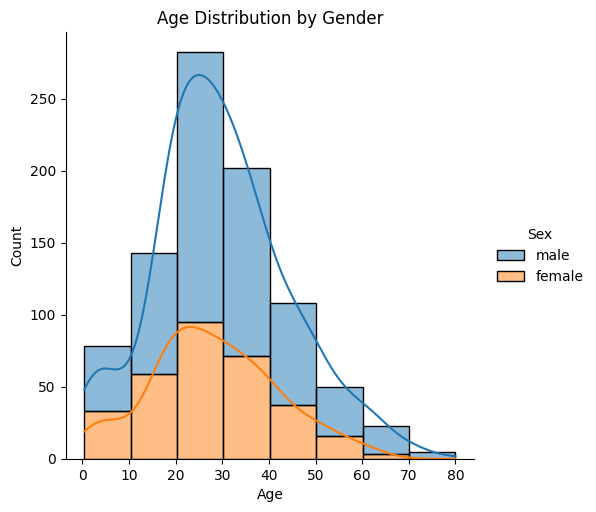

In [191]:
print(df['Sex'].value_counts())
sns.displot(data=df, x='Age_fixed', bins=8, hue='Sex', 
             kde=True, multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

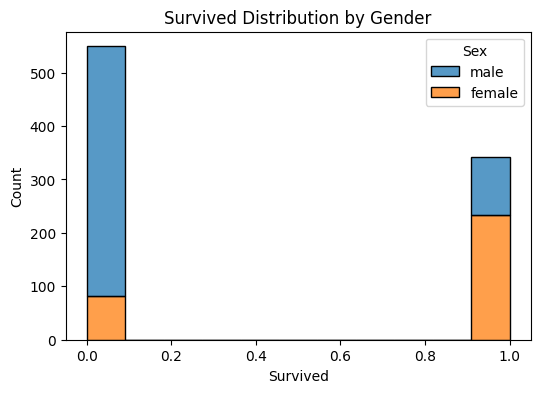

In [192]:
sns.histplot(data=df, x='Survived', hue='Sex',
             multiple='stack')
plt.title('Survived Distribution by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

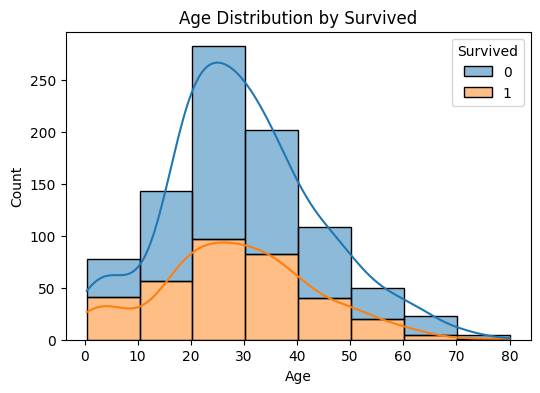

In [193]:
sns.histplot(data=df, x='Age_fixed', bins=8, hue='Survived', 
             kde=True, multiple='stack')
plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

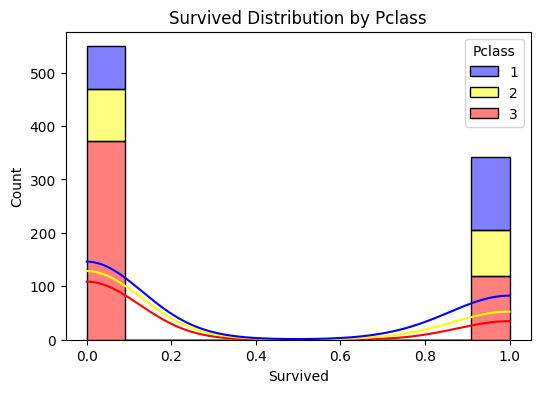

In [194]:
sns.histplot(data=df, x='Survived', hue='Pclass', 
             kde=True, multiple='stack', palette=['blue','yellow','red'])
plt.title('Survived Distribution by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

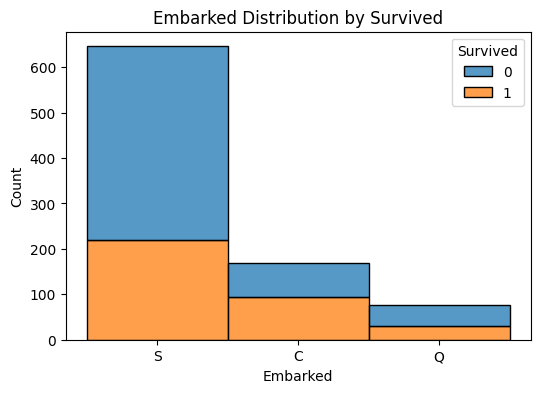

In [195]:
sns.histplot(data=df, x='Embarked', hue='Survived', 
             multiple='stack')
plt.title('Embarked Distribution by Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

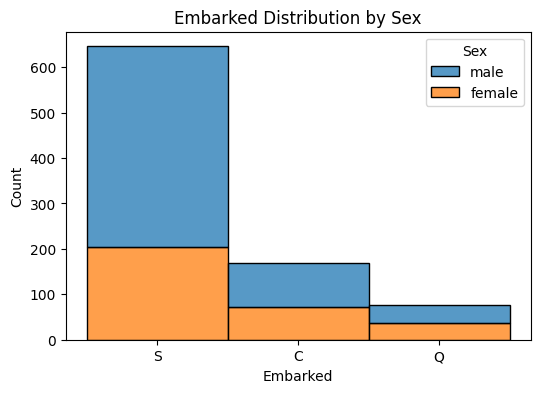

In [196]:
sns.histplot(data=df, x='Embarked', hue='Sex', 
              multiple='stack')
plt.title('Embarked Distribution by Sex')
plt.xlabel('Embarked')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

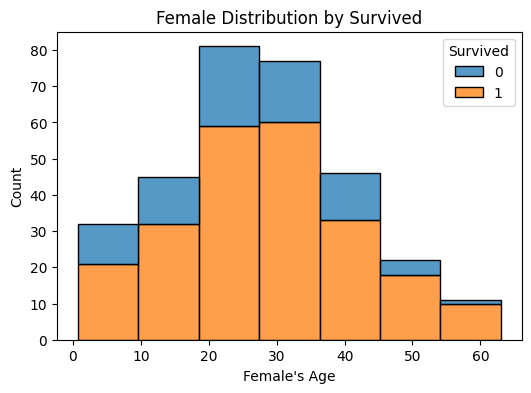

In [197]:
filt=df[df['Sex']=='female']
sns.histplot(data=filt, x='Age_fixed',  bins= 7, hue='Survived', 
              multiple='stack')
plt.title('Female Distribution by Survived')
plt.xlabel("Female's Age")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

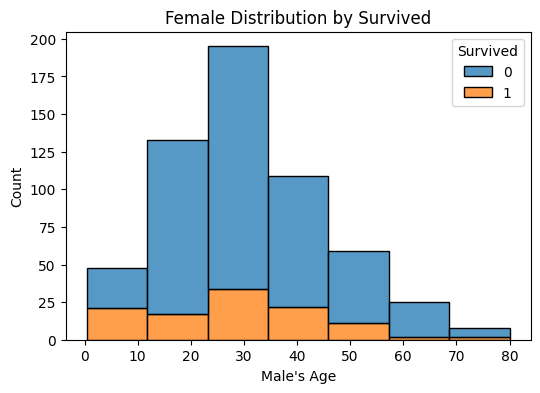

In [198]:
filt=df[df['Sex']=='male']
sns.histplot(data=filt, x='Age_fixed', bins=7, hue='Survived', 
              multiple='stack')
plt.title('Female Distribution by Survived')
plt.xlabel("Male's Age")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

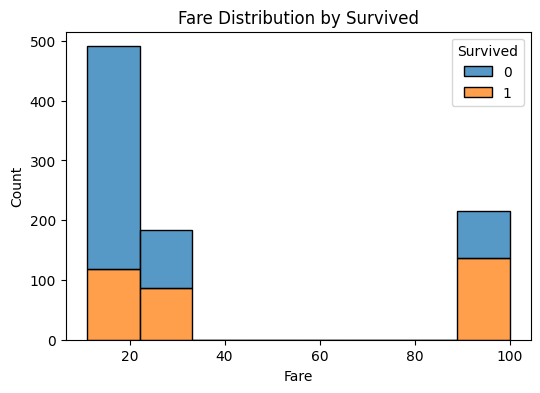

In [199]:
sns.histplot(data=df, x='Fare', bins=8, hue='Survived', 
            multiple='stack')
plt.title('Fare Distribution by Survived')
plt.xlabel('Fare')
plt.ylabel('Count')

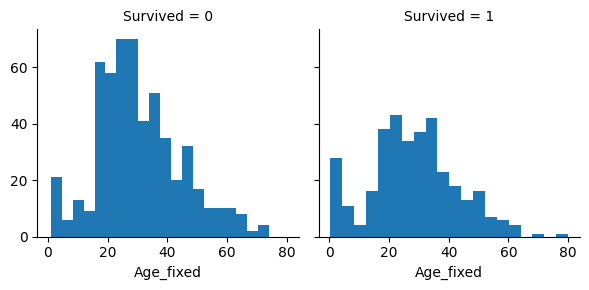

In [200]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age_fixed', bins=20)

<Axes: xlabel='Age_fixed', ylabel='Sex'>

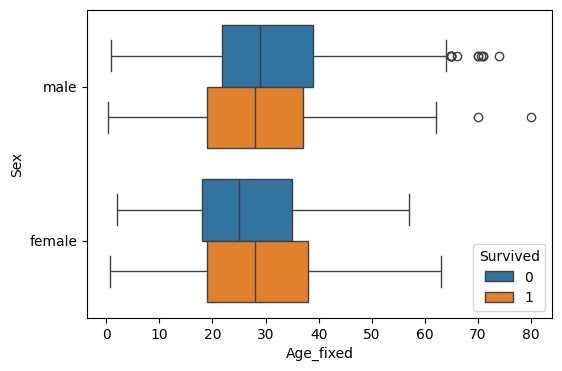

In [201]:
sns.boxplot(data=df, x='Age_fixed', y='Sex', hue='Survived', orient='h')

<Axes: xlabel='Survived', ylabel='Sex'>

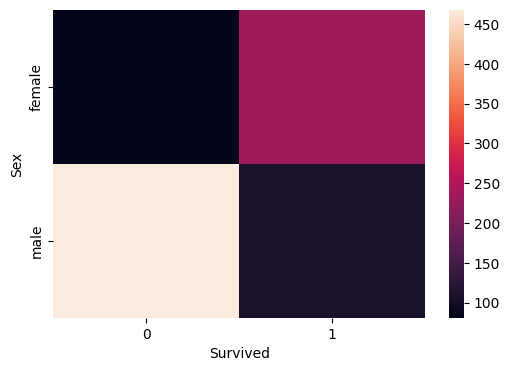

In [202]:
sns.heatmap(pd.crosstab(df['Sex'], df['Survived']))

In [203]:
df.corr(numeric_only=True)

,Survived,Pclass,Fare,Family_Member,Age_Missing,Age_fixed
Survived,1.000000,-0.338481,0.309801,0.016639,-0.092197,-0.064535
Pclass,-0.338481,1.000000,-0.944490,0.065997,0.172933,-0.286861
Fare,0.309801,-0.944490,1.000000,-0.053583,-0.114834,0.284872
Family_Member,0.016639,0.065997,-0.053583,1.000000,-0.049043,-0.244695
Age_Missing,-0.092197,0.172933,-0.114834,-0.049043,1.000000,0.015761
Age_fixed,-0.064535,-0.286861,0.284872,-0.244695,0.015761,1.000000


<Axes: >

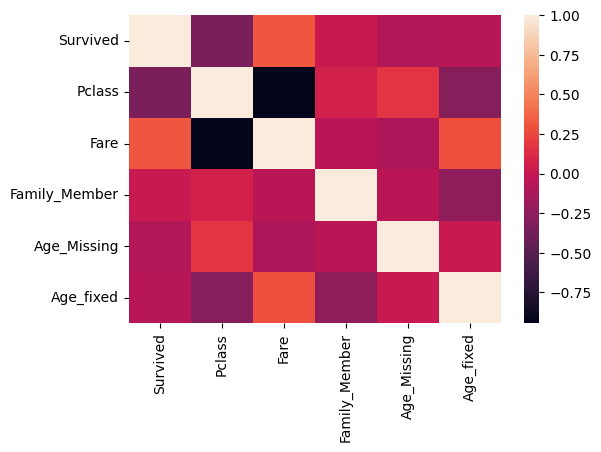

In [204]:
sns.heatmap(df.corr(numeric_only=True))

## Work for Model

### DF Copy

In [205]:
df_copy=df.copy()

### Train - Test Split

In [206]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
train_df, test_df, train_target,test_target= train_test_split(x,y, test_size=0.2, random_state=42)

### Encoding

In [207]:
categorical_col=['Pclass', 'Sex','Embarked']

encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_col])

encoded_col=list(encoder.get_feature_names_out(categorical_col))

train_df[encoded_col]=encoder.transform(train_df[categorical_col])
test_df[encoded_col]=encoder.transform(test_df[categorical_col])

In [208]:
train_df.drop(columns=['Pclass', 'Sex','Embarked'], inplace=True)
test_df.drop(columns=['Pclass', 'Sex','Embarked'], inplace=True)

### Scaling

In [210]:
scaler= StandardScaler()
scaler.fit(df[['Fare', 'Age_fixed']])

train_df[['Fare', 'Age_fixed']]=scaler.transform(train_df[['Fare', 'Age_fixed']])
test_df[['Fare', 'Age_fixed']]=scaler.transform(test_df[['Fare', 'Age_fixed']])

In [212]:
train_df.sample(10)

,Fare,Family_Member,Age_Missing,Age_fixed,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
380,1.748557,0,0,0.846441,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
126,-0.662943,0,1,0.013049,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
245,1.748557,2,0,0.985340,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
829,1.748557,0,0,2.235428,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
850,-0.662943,6,0,-1.792634,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
112,-0.662943,0,0,-0.542546,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
374,-0.662943,4,0,-1.862083,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
690,1.748557,1,0,0.082498,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
124,1.748557,1,0,1.679833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
645,1.748557,1,0,1.263137,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Model Comparison

In [213]:
def model_comparison_evaluate(classifiers, X, y):
    print('Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=5, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean()*100, scores.std()))

        print('\n')

In [235]:
classifiers = { 
                'Random Forest Classifier':RandomForestClassifier(criterion='gini',
                                                                  class_weight='balanced',
                                                                  random_state=42, n_estimators=500,  n_jobs=-1,
                                                                  min_samples_split=2, min_samples_leaf=1,
                                                                  max_depth=17, bootstrap=True ),

                'Decision Tree Classifier': DecisionTreeClassifier(random_state=42,criterion='gini', splitter='best', 
                                                                   max_depth= 4, max_features=8, 
                                                                   max_leaf_nodes=120),

                'XGBoost Classifier' : XGBClassifier(random_state=42, n_estimators=500, learning_rate=0.003,
                                                     max_depth=13, grow_policy = 'depthwise',
                                                     colsample_bytree = 0.7, colsample_bylevel = 0.7, colsample_bynode =0.7,
                                                     importance_type='weight', base_score=0.5,
                                                     booster='gbtree', n_jobs=-1)
              }

model_comparison_evaluate(classifiers, train_df, train_target)

Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 76.680 (0.019)
Mean precision score: 69.151 (0.033)
Mean recall score: 69.371 (0.080)
Mean f1 score: 68.934 (0.037)
Mean roc_auc score: 82.234 (0.026)


Decision Tree Classifier:
Mean accuracy score: 80.615 (0.030)
Mean precision score: 82.170 (0.048)
Mean recall score: 62.278 (0.100)
Mean f1 score: 70.314 (0.066)
Mean roc_auc score: 83.970 (0.031)


XGBoost Classifier:
Mean accuracy score: 81.879 (0.027)
Mean precision score: 86.778 (0.033)
Mean recall score: 61.160 (0.080)
Mean f1 score: 71.453 (0.060)
Mean roc_auc score: 85.458 (0.023)




## XGBoost Classifier Model

XGBClassifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.90      0.81      0.86       117
    Fraud [1]       0.70      0.84      0.76        62

     accuracy                           0.82       179
    macro avg       0.80      0.83      0.81       179
 weighted avg       0.83      0.82      0.82       179
 



Text(0.5, 0, 'False Positive Rate')

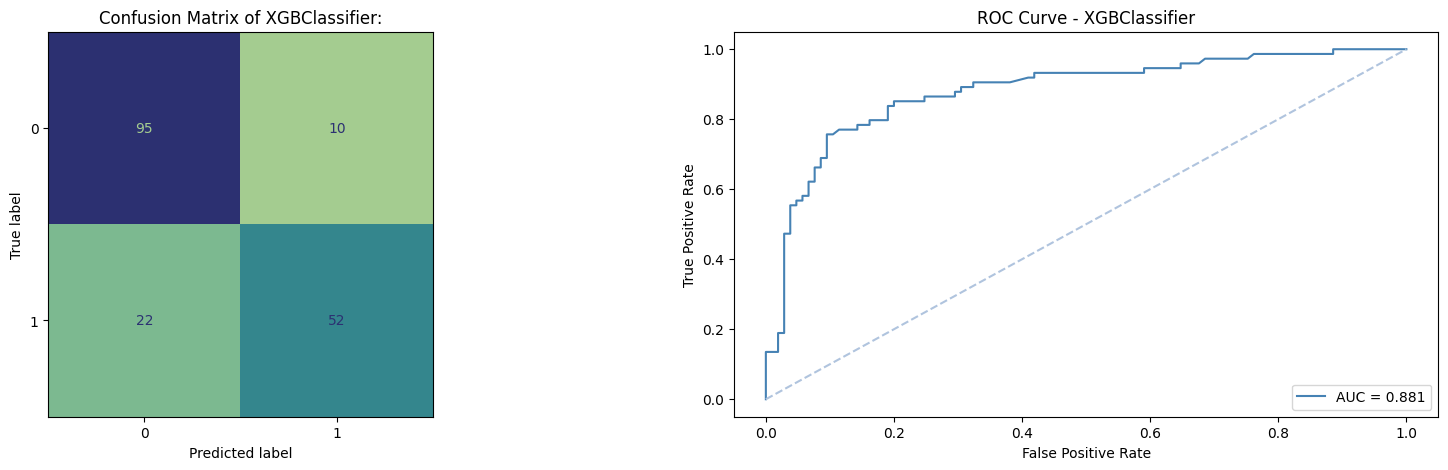

In [256]:
# Model
model = XGBClassifier(random_state=42, n_estimators=500, learning_rate=0.01,
                                                     max_depth=13, grow_policy = 'depthwise',
                                                     colsample_bytree = 0.7, colsample_bylevel = 0.7, colsample_bynode =0.7,
                                                     importance_type='weight', base_score=0.5,
                                                     booster='gbtree', n_jobs=-1)


model.fit(train_df, train_target) # Training
y_pred = model.predict(test_df) # Prediction
y_pred_score = model.predict_proba(test_df)[:,1] # Calculating Score
print('XGBClassifier:')
print(classification_report(y_pred, test_target, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')


# Plotting the graph and COnfusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XGBClassifier:')
ConfusionMatrixDisplay.from_predictions(test_target, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(test_target, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - XGBClassifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

## Testing and Training

In [243]:
'''A modular function to calculate the prediction on fresh Training and Predicting on Validation data'''

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    #Prinitng the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 86.80%


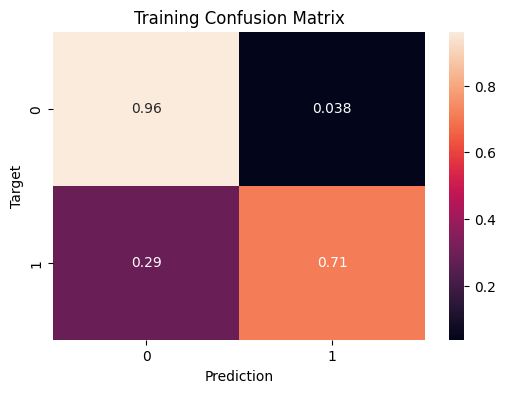

In [244]:
train_preds = predict_and_plot(train_df, train_target, 'Training')

Accuracy: 82.12%


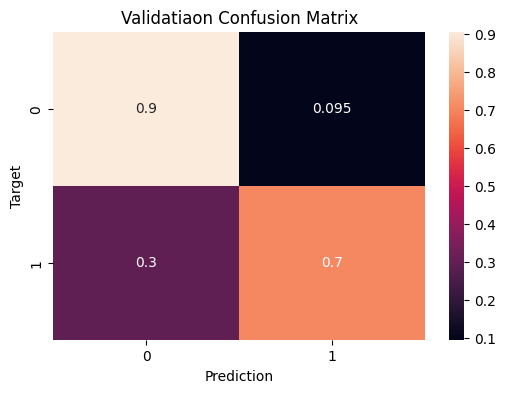

In [245]:
val_preds = predict_and_plot(test_df, test_target, 'Validatiaon')

In [246]:
x= pd.concat([train_df, test_df], axis=0)
y=pd.concat([train_target,test_target], axis=0)

In [250]:
x_train, y_train, x_target, y_target= train_test_split(x,y, test_size=0.25, shuffle=True)

Accuracy: 87.57%


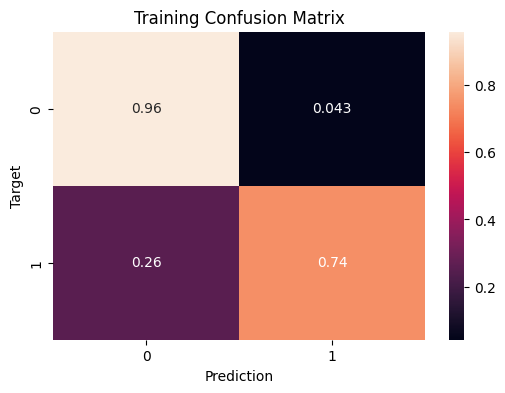

In [251]:
x_pred = predict_and_plot(x_train, x_target, 'Training')

Accuracy: 80.72%


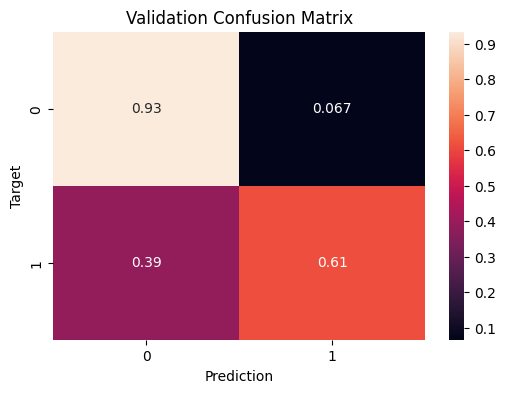

In [252]:
y_pred = predict_and_plot(y_train, y_target, 'Validation')

# Handling Test Data of Kaggle

### Data

In [257]:
kaggle_test_df= pd.read_csv('test.csv')
kaggle_test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S
72,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S
312,1204,3,"Sadowitz, Mr. Harry",male,NaN,0,0,LP 1588,7.5750,NaN,S
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
241,1133,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C
227,1119,3,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.7500,NaN,Q
154,1046,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S


## Worked on kaggle_test_df

### Phase 1
- Removed 'PassengerId','Name','Ticket'
- Created Family_Member using SibSp and Parch
- Removed 'SibSp','Parch' and Cabin

In [258]:
kaggle_test_df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
kaggle_test_df['Family_Member']=kaggle_test_df['SibSp']+kaggle_test_df['Parch']
kaggle_test_df.drop(columns=['SibSp','Parch'], inplace=True)
kaggle_test_df.drop(columns=['Cabin'], inplace=True)
kaggle_test_df.sample(10)

,Pclass,Sex,Age,Fare,Embarked,Family_Member
110,2,male,41.0,15.0458,C,0
246,2,female,22.0,21.0000,S,0
67,1,male,47.0,42.4000,S,0
26,1,female,22.0,61.9792,C,1
325,3,male,23.0,7.0500,S,0
47,3,male,NaN,7.7500,Q,0
135,3,male,24.0,7.8542,S,0
154,3,male,13.0,31.3875,S,6
295,3,male,26.0,7.8958,S,0
391,1,female,51.0,39.4000,S,1


### Phase 2
- Made Age_Missing indicator
- Filled Missing values of Age in Age_fixed column
- Removed Age Column

In [259]:
kaggle_test_df['Age_Missing']=np.where(kaggle_test_df['Age'].isna(), 1,0)
kaggle_test_df['Age_fixed']=kaggle_test_df['Age']
kaggle_test_df['Age_fixed'][kaggle_test_df['Age_fixed'].isna()]= kaggle_test_df['Age'].dropna().sample(kaggle_test_df['Age'].isnull().sum()).values
kaggle_test_df.drop(columns=['Age'], inplace=True)
kaggle_test_df.sample(10)

C:\Users\abhin\AppData\Local\Temp\ipykernel_16024\2142164648.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  kaggle_test_df['Age_fixed'][kaggle_test_df['Age_fixed'].isna()]= kaggle_test_df['Age'].dropna().sample(kaggle_test_df['Age'].isn

,Pclass,Sex,Fare,Embarked,Family_Member,Age_Missing,Age_fixed
189,2,male,13.0000,S,0,0,40.0
388,3,male,7.7500,Q,0,0,21.0
225,3,female,15.2458,C,2,1,18.0
135,3,male,7.8542,S,0,0,24.0
244,3,male,23.4500,S,3,1,21.0
38,3,male,9.5000,S,0,0,25.0
37,3,female,8.6625,S,0,0,21.0
74,1,female,211.5000,C,0,0,35.0
229,2,male,13.0000,S,0,0,36.0
120,2,female,15.7500,S,0,0,12.0


### Phase 3
- Handling Embarked nan values
- Fixing Fare Values as per model's need

In [260]:
kaggle_test_df['Embarked']=np.where(kaggle_test_df['Embarked'].isna(), 'S', kaggle_test_df['Embarked'])
kaggle_test_df['Embarked'].isna().sum()

0

In [261]:
kaggle_test_df['Fare']=np.where(kaggle_test_df['Pclass']==1, 100, np.where(kaggle_test_df['Pclass']==2, 25, 11))
kaggle_test_df.sample(10)

,Pclass,Sex,Fare,Embarked,Family_Member,Age_Missing,Age_fixed
109,2,male,25,S,0,0,18.5
226,3,male,11,S,0,0,23.0
289,3,male,11,S,0,1,23.0
329,2,male,25,S,0,0,21.0
297,3,male,11,C,2,1,23.0
129,3,male,11,S,0,0,24.0
293,1,male,100,S,2,0,53.0
338,2,male,25,S,0,0,25.0
359,3,female,11,S,1,0,30.0
127,3,female,11,Q,2,1,27.0


### Phase 4
- Encoding the columns
- Scaling the Values

In [262]:
categorical_col=['Pclass', 'Sex','Embarked']

encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(kaggle_test_df[categorical_col])

encoded_col=list(encoder.get_feature_names_out(categorical_col))

kaggle_test_df[encoded_col]=encoder.transform(kaggle_test_df[categorical_col])

In [263]:
kaggle_test_df.drop(columns=['Pclass', 'Sex','Embarked'], inplace=True)
kaggle_test_df.sample(10)

,Fare,Family_Member,Age_Missing,Age_fixed,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
205,100,0,1,21.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
342,11,10,1,26.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,25,1,0,24.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
388,11,0,0,21.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
417,11,2,1,26.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
227,11,0,1,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
23,100,1,0,21.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
249,11,1,1,23.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
78,25,0,0,30.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
341,11,0,0,32.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [264]:
scaler= StandardScaler()
scaler.fit(kaggle_test_df[['Fare', 'Age_fixed']])

kaggle_test_df[['Fare', 'Age_fixed']]=scaler.transform(kaggle_test_df[['Fare', 'Age_fixed']])
kaggle_test_df.sample(10)

,Fare,Family_Member,Age_Missing,Age_fixed,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
126,-0.691989,0,0,-0.583433,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
403,1.686151,0,0,-0.936321,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
352,-0.317899,0,0,-0.865743,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
267,-0.691989,0,1,1.039850,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
42,-0.691989,0,0,0.757540,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
320,-0.691989,0,0,-0.301123,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
251,-0.691989,0,0,-0.724588,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
375,1.686151,0,0,1.039850,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
255,-0.691989,0,1,-0.230545,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
37,-0.691989,0,0,-0.654011,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Phase 5
- Training XGBoost Clssifier on entire dataset(kaggle-train)
- Prediciting Values on kaggle_test_df

#### Dataset Complete

In [267]:
x= pd.concat([train_df, test_df], axis=0)
y=pd.concat([train_target,test_target], axis=0)

x.shape, y.shape

((891, 12), (891,))

#### Model

XGBClassifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.95      0.93      0.94       108
    Fraud [1]       0.89      0.93      0.91        71

     accuracy                           0.93       179
    macro avg       0.92      0.93      0.92       179
 weighted avg       0.93      0.93      0.93       179
 



Text(0.5, 0, 'False Positive Rate')

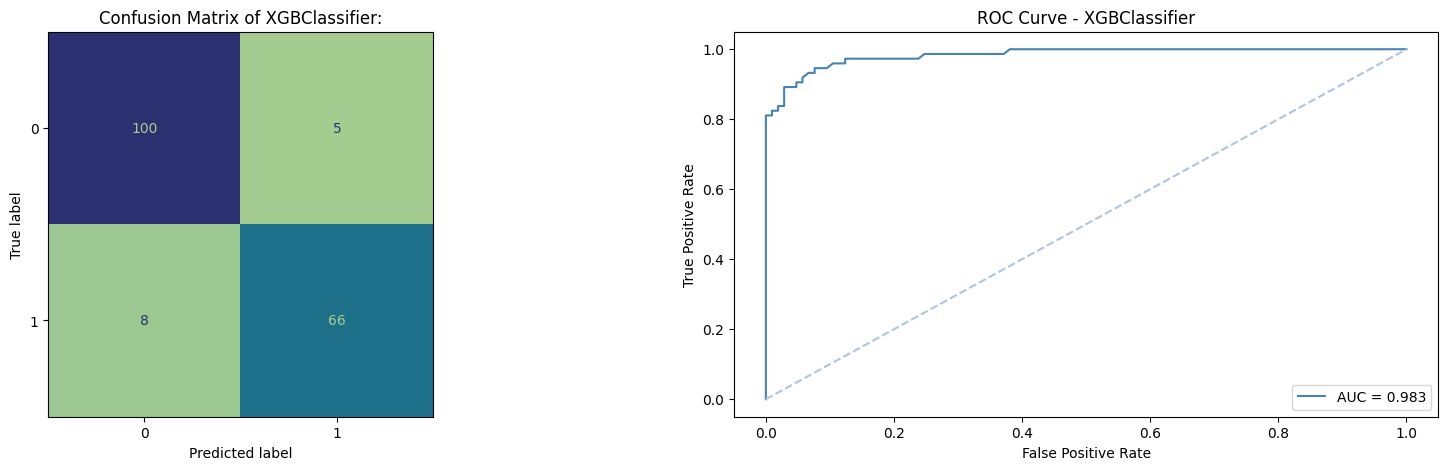

In [279]:
# Model
model = XGBClassifier(random_state=42, n_estimators=500, learning_rate=0.07,
                                                     max_depth=13, grow_policy = 'depthwise',
                                                     colsample_bytree = 0.7, colsample_bylevel = 0.7, colsample_bynode =0.7,
                                                     importance_type='weight', base_score=0.5,
                                                     booster='gbtree', n_jobs=-1)


model.fit(x, y) # Training
y_pred = model.predict(test_df) # Prediction
y_pred_score = model.predict_proba(test_df)[:,1] # Calculating Score
print('XGBClassifier:')
print(classification_report(y_pred, test_target, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')


# Plotting the graph and COnfusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of XGBClassifier:')
ConfusionMatrixDisplay.from_predictions(test_target, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(test_target, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - XGBClassifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

#### Modular Testing

In [274]:
'''A modular function to calculate the prediction on fresh Training and Predicting on Validation data'''

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    #Prinitng the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

In [285]:
x_train, y_train, x_target, y_target= train_test_split(x,y, test_size=0.25, shuffle=True)

Accuracy: 92.81%


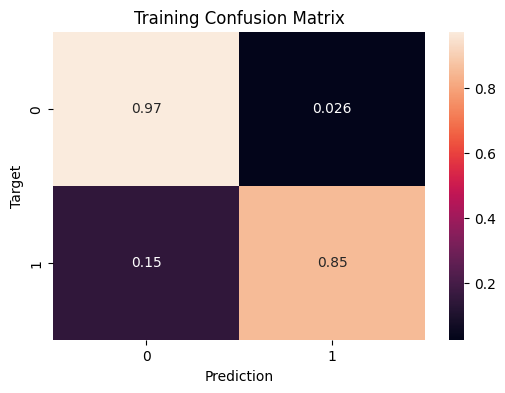

In [286]:
x_pred = predict_and_plot(x_train, x_target, 'Training')

Accuracy: 91.03%


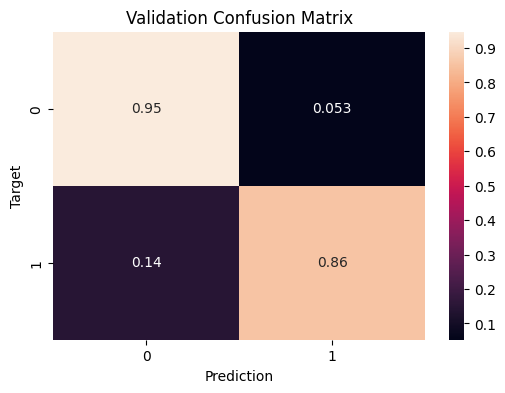

In [287]:
y_pred = predict_and_plot(y_train, y_target, 'Validation')

#### Predicting on Kaggle Test

In [288]:
kaggle_test_pred= model.predict(kaggle_test_df)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

### Phase 6
- Storing them on csv file

In [297]:
submit= pd.read_csv('gender_submission.csv')
submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [298]:
submit.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [299]:
submit['Survived']=kaggle_test_pred

In [300]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [301]:
submit.to_csv('gender_submission.csv', index=None)

In [303]:
submit= pd.read_csv('gender_submission.csv')
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Understanding Features

In [304]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df

,feature,importance
3,Age_fixed,0.369067
1,Family_Member,0.165929
0,Fare,0.066874
2,Age_Missing,0.064159
11,Embarked_S,0.059835
7,Sex_female,0.048974
9,Embarked_C,0.046862
8,Sex_male,0.041231
4,Pclass_1,0.035800
6,Pclass_3,0.035499


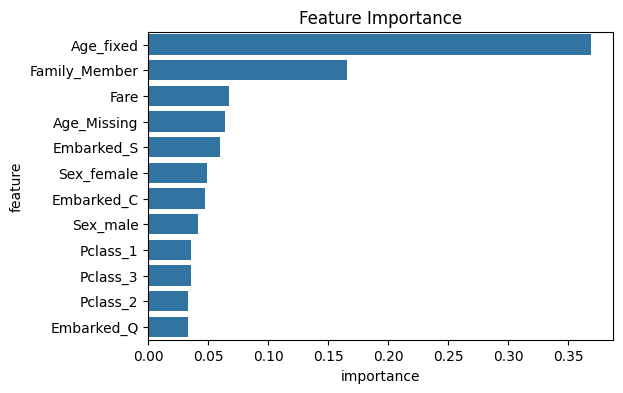

In [305]:
#plotting the Important Features

plt.title('Feature Importance')
sns.barplot(importance_df, x='importance', y='feature');